# **Abalone Age Prediction**

## 1. Download the dataset

In [1]:
# Dataset Downloaded

## 2. Load the dataset

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('abalone.csv')

In [4]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [5]:
#Modifying the given dataset
Age=1.5+df.Rings
df["Age"]=Age
df=df.rename(columns = {'Whole weight':'Whole_weight','Shucked weight': 'Shucked_weight','Viscera weight': 'Viscera_weight',
                            'Shell weight': 'Shell_weight'})
df=df.drop(columns=["Rings"],axis=1)
df.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


In [6]:
df.tail()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Age
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,12.5
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,11.5
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,10.5
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,11.5
4176,M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.4950,13.5


## 3. Perform Below Visualizations

### Univariate Analysis

<AxesSubplot: xlabel='Sex', ylabel='count'>

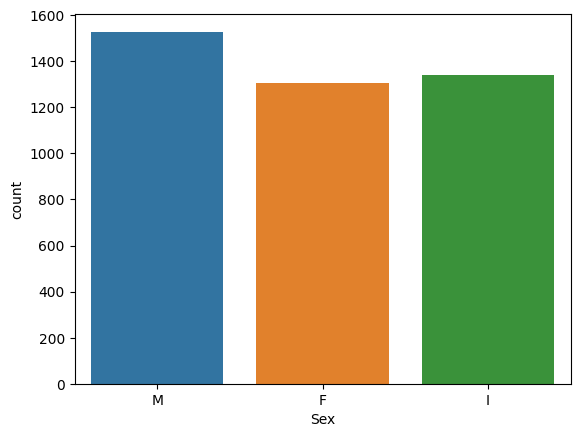

In [7]:
sns.countplot(x='Sex',data=df)

<AxesSubplot: xlabel='Height', ylabel='Count'>

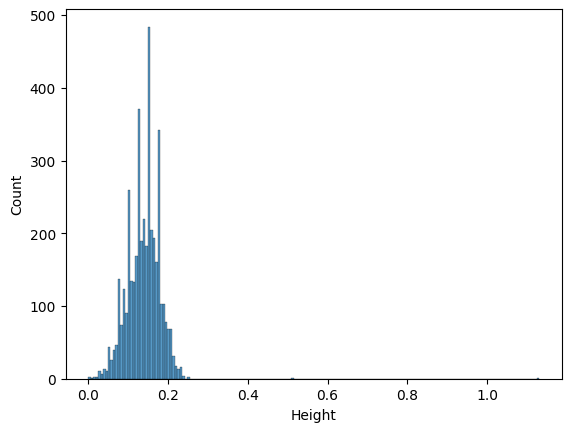

In [8]:
sns.histplot(x='Height',data=df)

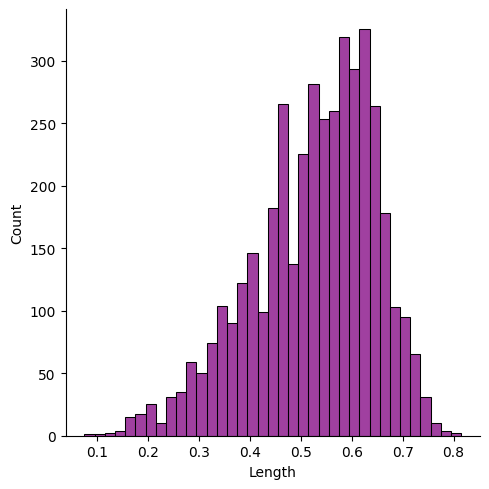

In [9]:
sns.displot(df["Length"],color='purple')

<AxesSubplot: xlabel='Length'>

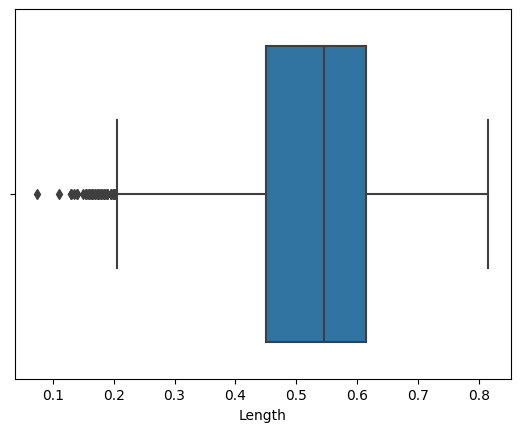

In [10]:
sns.boxplot(x=df["Length"])

### Bi-Variate Analysis

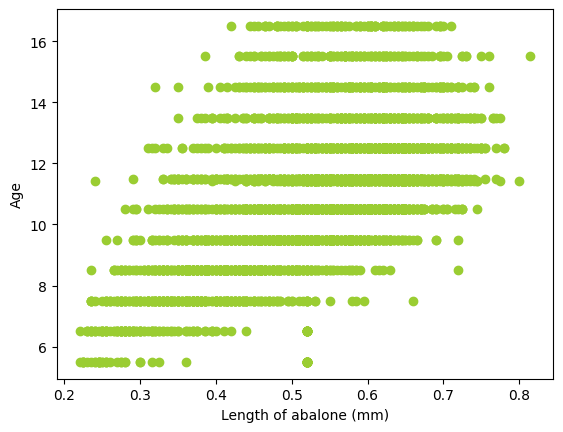

In [69]:
plt.scatter(df['Length'], df['Age'], c='yellowgreen')
plt.xlabel('Length of abalone (mm)')
plt.ylabel('Age')
plt.show()

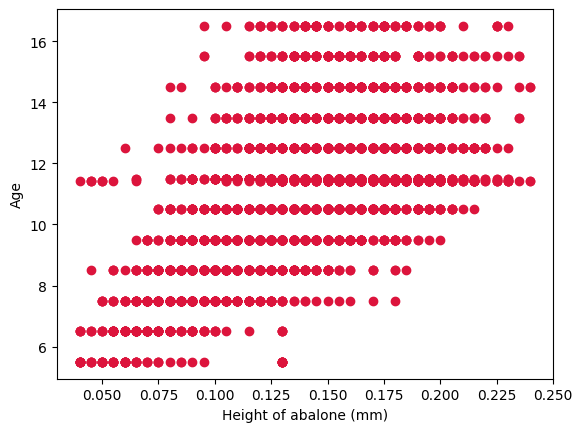

In [70]:
plt.scatter(df['Height'], df['Age'], c='crimson')
plt.xlabel('Height of abalone (mm)')
plt.ylabel('Age')
plt.show()

<AxesSubplot: xlabel='Age', ylabel='Whole_weight'>

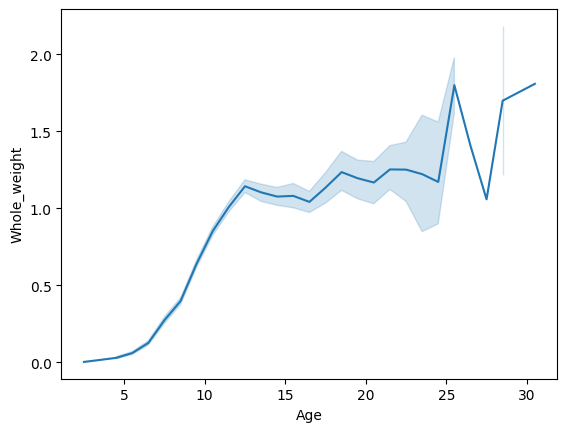

In [13]:
sns.lineplot(x=df["Age"],y=df["Whole_weight"])

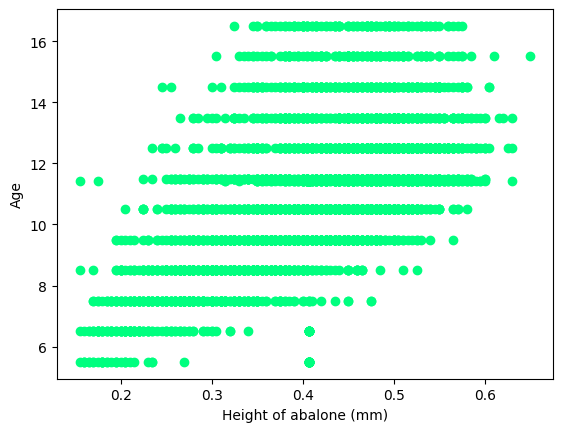

In [140]:
plt.scatter(df['Diameter'], df['Age'],c='springgreen')
plt.xlabel('Height of abalone (mm)')
plt.ylabel('Age')
plt.show()

### Multi-Variate Analysis

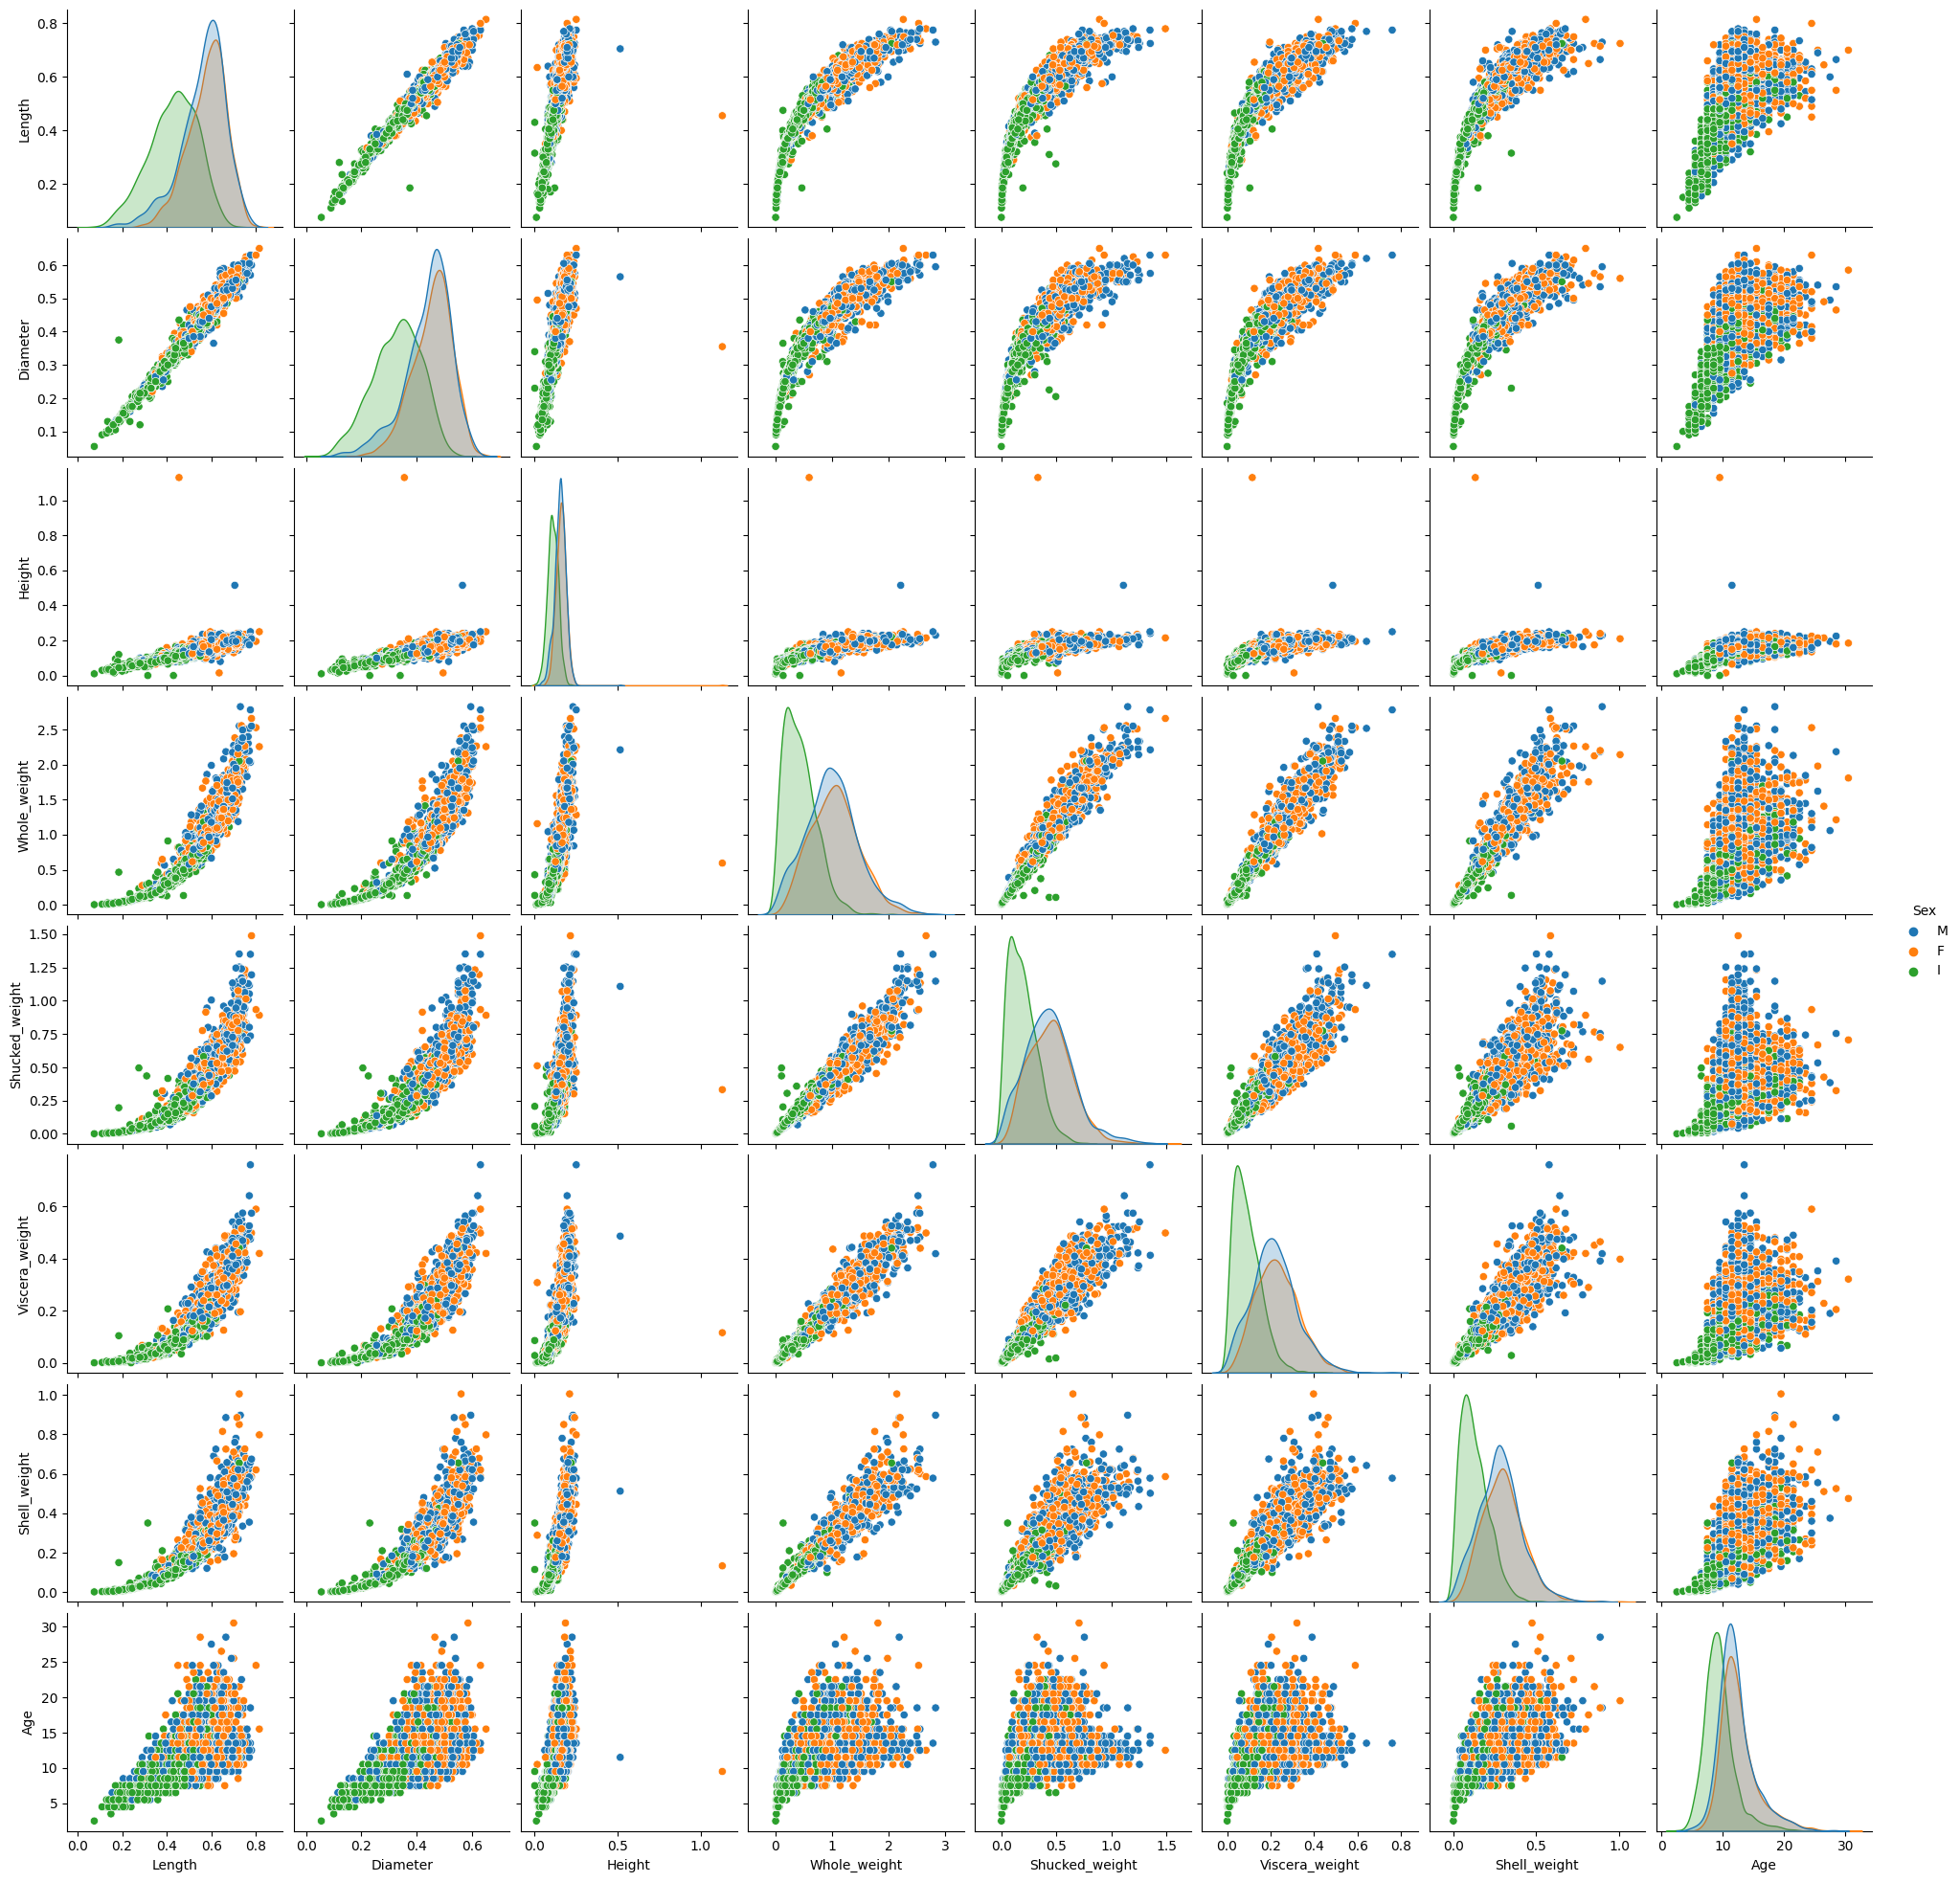

In [15]:
sns.pairplot(df,hue='Sex')

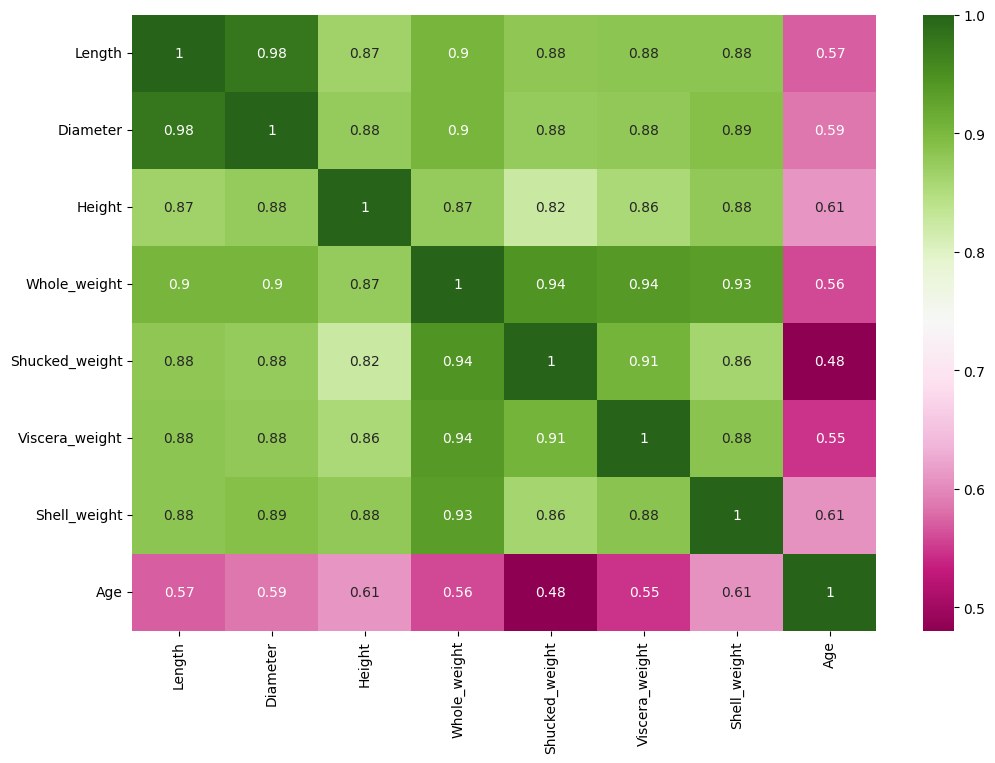

In [88]:
plt.figure(figsize=(12,8));
sns.heatmap(df.corr(), cmap="PiYG",annot=True);

## 4. Descriptive statistics

In [17]:
df.describe()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,11.433684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,30.500000


## 5. Check for Missing values and deal with them

In [18]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Age               0
dtype: int64

## 6. Find the outliers and Replace their outliers

In [19]:
col =['Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight', 'Age']

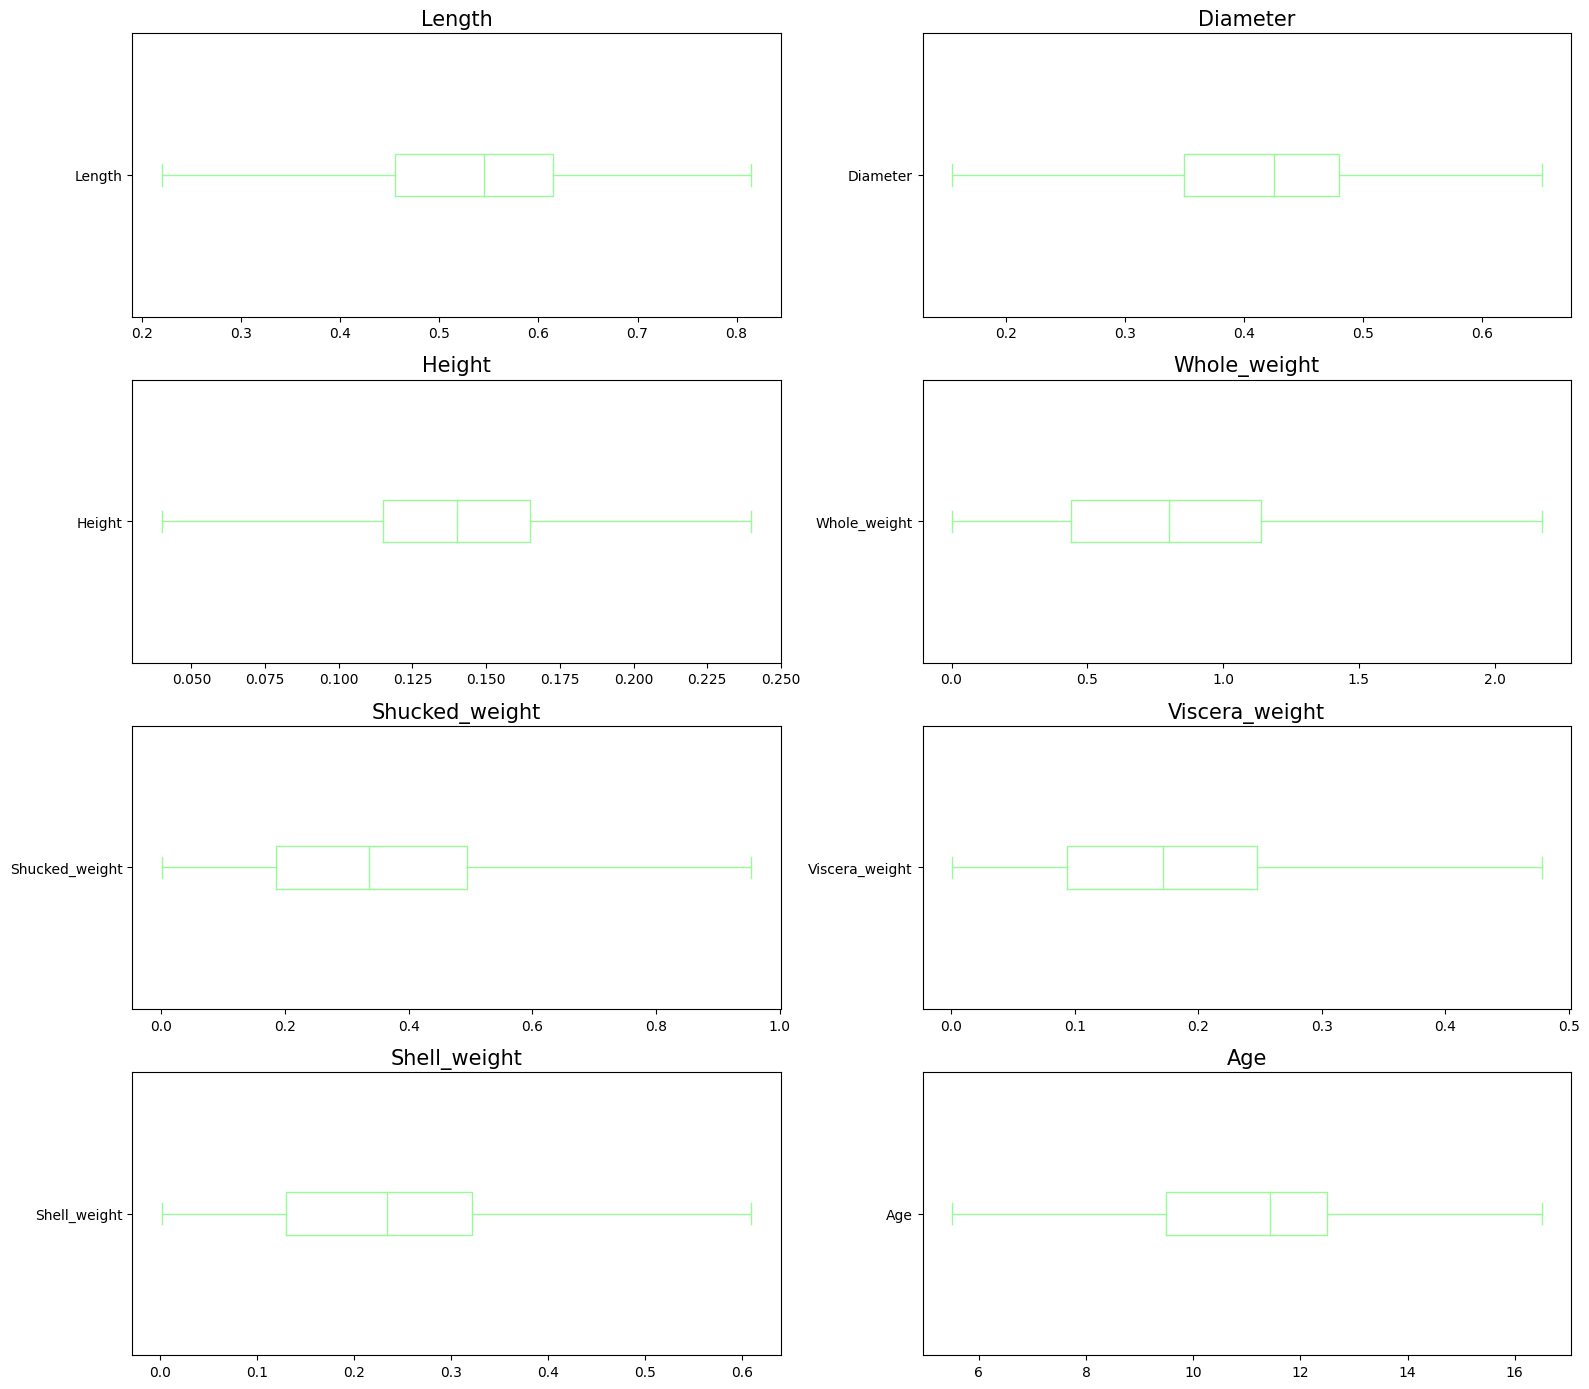

In [82]:
figfig, axes = plt.subplots(4,2,figsize=(16, 14))
axes = np.ravel(axes)
for i, c in enumerate(col):
    hist = df[c].plot(kind = 'box', ax=axes[i],color='palegreen', vert=False)
    axes[i].set_title(c, fontsize=15)
    
plt.tight_layout()
plt.show()

In [89]:
qnt = df.quantile([0.75,0.25])
qnt

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Age
0.75,0.615,0.48,0.165,1.1390,0.4935,0.2475,0.322,12.5
0.25,0.455,0.35,0.115,0.4415,0.1860,0.0935,0.130,9.5


In [90]:
IQR = qnt.loc[0.75] - qnt.loc[0.25]
IQR

Length            0.1600
Diameter          0.1300
Height            0.0500
Whole_weight      0.6975
Shucked_weight    0.3075
Viscera_weight    0.1540
Shell_weight      0.1920
Age               3.0000
dtype: float64

In [91]:
lower = qnt.loc[0.25] - 1.5 * IQR
lower

Length            0.21500
Diameter          0.15500
Height            0.04000
Whole_weight     -0.60475
Shucked_weight   -0.27525
Viscera_weight   -0.13750
Shell_weight     -0.15800
Age               5.00000
dtype: float64

In [92]:
upper = qnt.loc[0.75] + 1.5 * IQR
upper

Length             0.85500
Diameter           0.67500
Height             0.24000
Whole_weight       2.18525
Shucked_weight     0.95475
Viscera_weight     0.47850
Shell_weight       0.61000
Age               17.00000
dtype: float64

In [93]:
df.mean()

Length             0.529285
Diameter           0.411831
Height             0.139703
Whole_weight       0.815145
Shucked_weight     0.350291
Viscera_weight     0.177318
Shell_weight       0.233878
Age               10.944228
dtype: float64

In [94]:
df['Length']=np.where(df['Length']<0.22,0.52,df['Length'])

In [95]:
df['Diameter']=np.where(df['Diameter']<0.155,0.407,df['Diameter'])

In [96]:
df['Height']=np.where(df['Height']<0.04,0.13,df['Height'])

In [97]:
df['Height']=np.where(df['Height']>0.24,0.13,df['Height'])

In [98]:
df['Whole_weight']=np.where(df['Whole_weight']>2.18,0.83,df['Whole_weight'])

In [99]:
df['Shucked_weight']=np.where(df['Shucked_weight']>0.958,0.359367,df['Shucked_weight'])

In [100]:
df['Viscera_weight']=np.where(df['Viscera_weight']>0.478,0.18,df['Viscera_weight'])

In [101]:
df['Shell_weight']=np.where(df['Shell_weight']>0.61,0.238831,df['Shell_weight'])

In [102]:
df['Age']=np.where(df['Age']<5.0,11.43,df['Age'])

In [103]:
df['Age']=np.where(df['Age']>17.0,11.43,df['Age'])

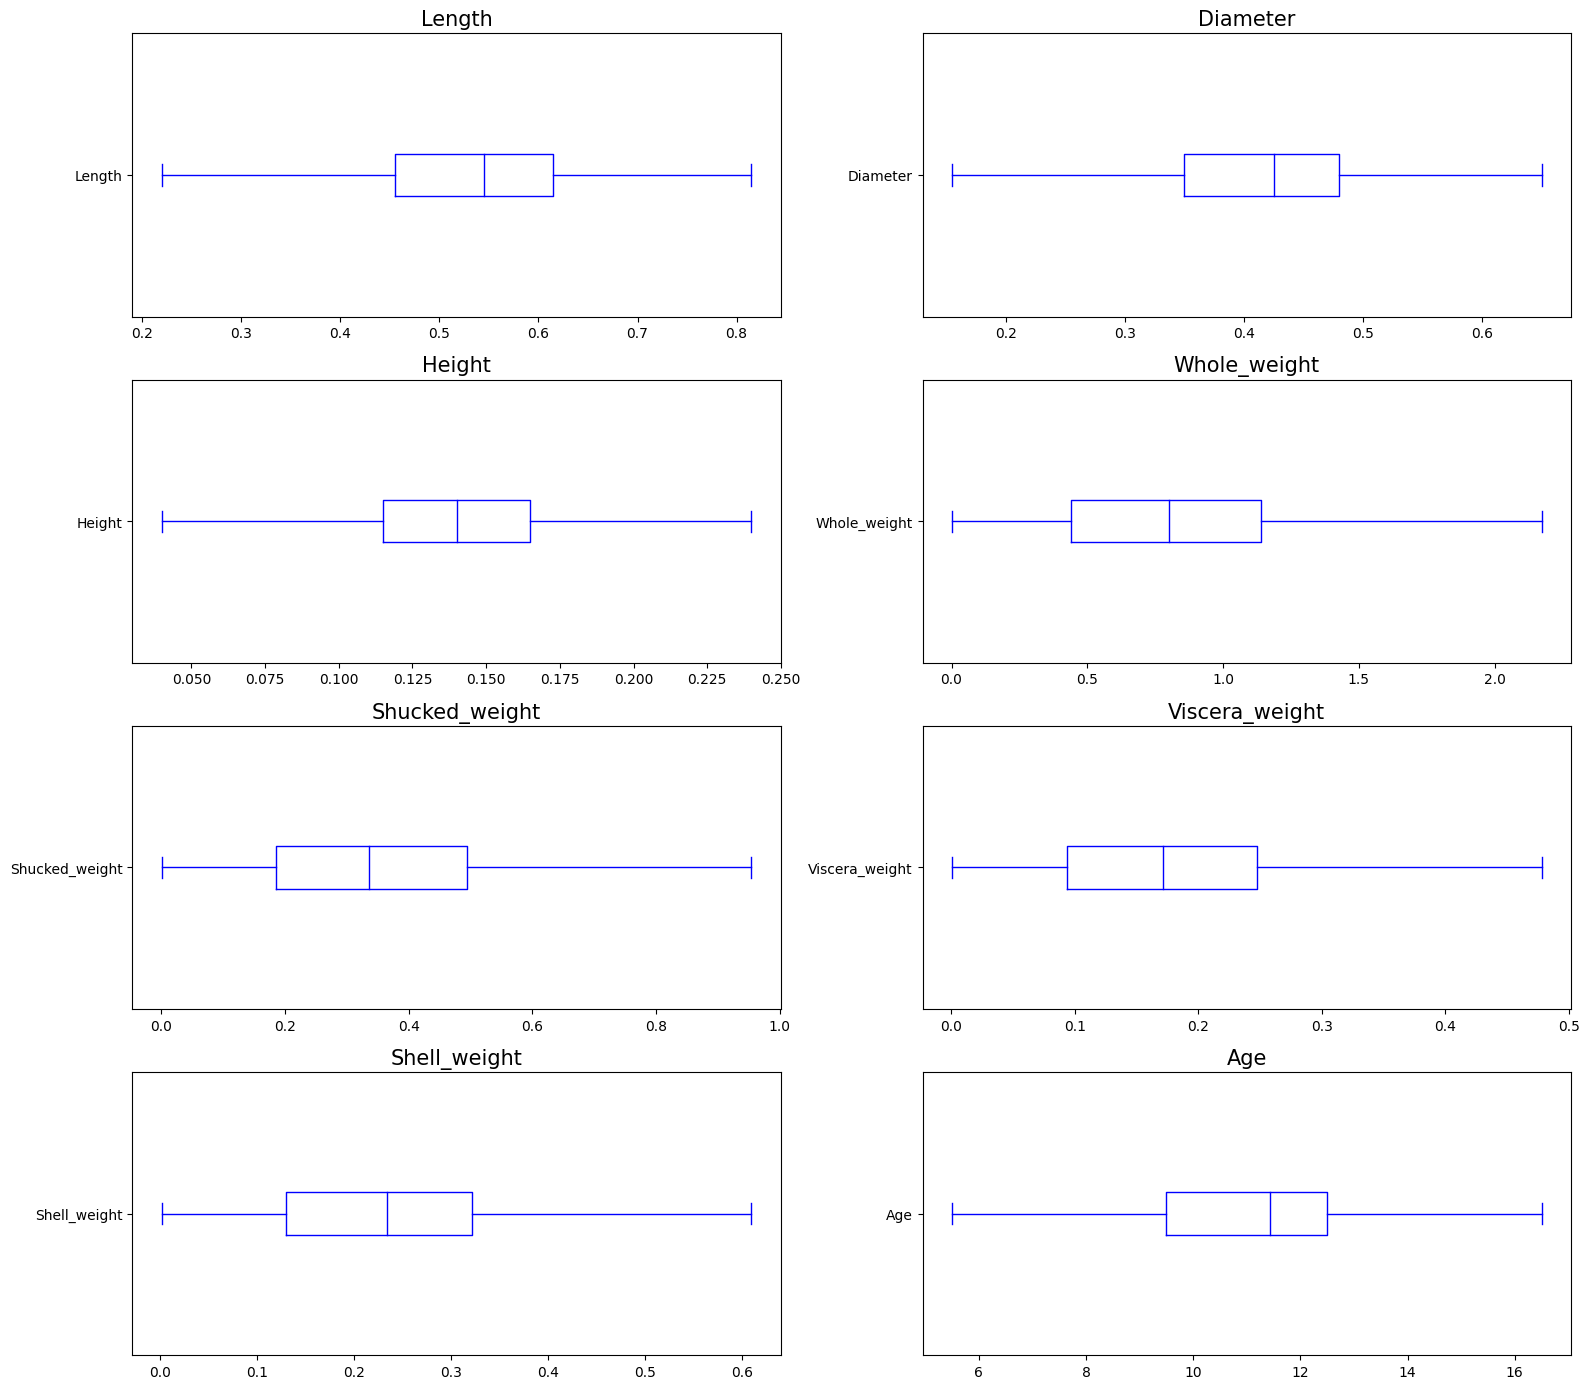

In [104]:
figfig, axes = plt.subplots(4,2,figsize=(16, 14))
axes = np.ravel(axes)

for i, c in enumerate(col):
    hist = df[c].plot(kind = 'box', ax=axes[i],color='blue', vert=False)
    axes[i].set_title(c, fontsize=15)
    
plt.tight_layout()
plt.show()

In [105]:
df.shape

(4177, 9)

## 7. Check for Categorical columns and perform encoding

In [106]:
df['Sex'].unique()

array(['M', 'F', 'I'], dtype=object)

In [107]:
x = pd.get_dummies(df)

In [108]:
x.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Age,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5,0,1,0


## 8. Split the data into dependent and independent variables

In [109]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Length          4177 non-null   float64
 1   Diameter        4177 non-null   float64
 2   Height          4177 non-null   float64
 3   Whole_weight    4177 non-null   float64
 4   Shucked_weight  4177 non-null   float64
 5   Viscera_weight  4177 non-null   float64
 6   Shell_weight    4177 non-null   float64
 7   Age             4177 non-null   float64
 8   Sex_F           4177 non-null   uint8  
 9   Sex_I           4177 non-null   uint8  
 10  Sex_M           4177 non-null   uint8  
dtypes: float64(8), uint8(3)
memory usage: 273.4 KB


In [110]:
X = x.drop(['Age'], axis = 1)

In [128]:
X.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Sex_F,Sex_I,Sex_M
0,-0.663474,-0.501673,-1.196422,-0.643390,-0.611770,-0.732343,-0.643590,-0.674834,-0.688018,1.316677
1,-1.601273,-1.572915,-1.330241,-1.259765,-1.219694,-1.236126,-1.257424,-0.674834,-0.688018,1.316677
2,0.006383,0.087510,-0.125873,-0.295144,-0.456142,-0.343709,-0.183214,1.481846,-0.688018,-0.759488
3,-0.797445,-0.501673,-0.393511,-0.639118,-0.655541,-0.607596,-0.605225,-0.674834,-0.688018,1.316677
4,-1.779901,-1.680039,-1.597878,-1.303563,-1.268328,-1.322489,-1.372518,-0.674834,1.453451,-0.759488


In [112]:
y = x['Age']

In [129]:
y.head()

0    16.5
1     8.5
2    10.5
3    11.5
4     8.5
Name: Age, dtype: float64

## 9. Scale the independent variables

In [114]:
from sklearn.preprocessing import StandardScaler

In [115]:
X_columns = X.select_dtypes(include=np.number).columns.tolist()
X_columns

['Length',
 'Diameter',
 'Height',
 'Whole_weight',
 'Shucked_weight',
 'Viscera_weight',
 'Shell_weight',
 'Sex_F',
 'Sex_I',
 'Sex_M']

In [116]:
scaler = StandardScaler()

In [117]:
X[X_columns] = scaler.fit_transform(X[X_columns])

In [118]:
X.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Sex_F,Sex_I,Sex_M
0,-0.663474,-0.501673,-1.196422,-0.643390,-0.611770,-0.732343,-0.643590,-0.674834,-0.688018,1.316677
1,-1.601273,-1.572915,-1.330241,-1.259765,-1.219694,-1.236126,-1.257424,-0.674834,-0.688018,1.316677
2,0.006383,0.087510,-0.125873,-0.295144,-0.456142,-0.343709,-0.183214,1.481846,-0.688018,-0.759488
3,-0.797445,-0.501673,-0.393511,-0.639118,-0.655541,-0.607596,-0.605225,-0.674834,-0.688018,1.316677
4,-1.779901,-1.680039,-1.597878,-1.303563,-1.268328,-1.322489,-1.372518,-0.674834,1.453451,-0.759488


## 10. Split the data into training and testing

In [119]:
X.shape, y.shape

((4177, 10), (4177,))

In [120]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [121]:
print(' x_train.shape : ',x_train.shape)
print(' y_train.shape : ',y_train.shape)
print(' x_test.shape : ',x_test.shape)
print(' y_test.shape : ',y_test.shape)

 x_train.shape :  (3341, 10)
 y_train.shape :  (3341,)
 x_test.shape :  (836, 10)
 y_test.shape :  (836,)


##  Build the Model, Train the Model and Test the Model

In [122]:
#Linear Regression
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)

lr_pred = lr.predict(x_test)

In [123]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,make_scorer
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestRegressor()

param = {
    'max_depth':[3,6,9,12,15],
    'n_estimators' : [10,50,100,150,200] 
}

rf_search = RandomizedSearchCV(rf,param_distributions=param,n_iter=5,scoring=make_scorer(mean_squared_error),
                               n_jobs=-1,cv=5,verbose=3)

rf_search.fit(x_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=5, n_jobs=-1,
                   param_distributions={'max_depth': [3, 6, 9, 12, 15],
                                        'n_estimators': [10, 50, 100, 150,
                                                         200]},
                   scoring=make_scorer(mean_squared_error), verbose=3)

In [124]:
means = rf_search.cv_results_['mean_test_score']
params = rf_search.cv_results_['params']
for mean, param in zip(means, params):
    print("%f with: %r" % (mean, param))
    if mean == min(means):
        print('Best parameters with the minimum Mean Square Error are:',param)

2.640939 with: {'n_estimators': 100, 'max_depth': 6}
Best parameters with the minimum Mean Square Error are: {'n_estimators': 100, 'max_depth': 6}
2.700586 with: {'n_estimators': 10, 'max_depth': 6}
2.652001 with: {'n_estimators': 50, 'max_depth': 6}
2.908811 with: {'n_estimators': 50, 'max_depth': 3}
2.744786 with: {'n_estimators': 150, 'max_depth': 15}


In [125]:
rf = RandomForestRegressor(n_estimators=50, max_depth=6)
rf.fit(x_train,y_train)

rf_pred =  rf.predict(x_test)

# 14. Measure the performance using Metrics

In [137]:
from sklearn import metrics
RMSE1 = np.sqrt(metrics.mean_squared_error(y_test, lr_pred))
MAE = metrics.mean_absolute_error(y_test, lr_pred)
MSE = metrics.mean_squared_error(y_test, lr_pred)
R2 = metrics.r2_score(y_test,lr_pred)
print('Linear Regression :')
print('-------------------')
print('MAE:', MAE)
print('MSE:', MSE)
print('RMSE:', RMSE1)
print('R2 Score :',R2)
print('\n\n')

Linear Regression :
-------------------
MAE: 1.3252222883409852
MSE: 2.9793407734555917
RMSE: 1.726076699760353
R2 Score : 0.4480445148439044





In [138]:
from sklearn import metrics
RMSE2 = np.sqrt(metrics.mean_squared_error(y_test, rf_pred))
MAE = metrics.mean_absolute_error(y_test, rf_pred)
MSE = metrics.mean_squared_error(y_test, rf_pred)
R2 = metrics.r2_score(y_test,rf_pred)
print('Random Forest Contains:')
print('-------------------')
print('MAE:', MAE)
print('MSE:', MSE)
print('RMSE:', RMSE2)
print('R2 Score :',R2)

Random Forest Contains:
-------------------
MAE: 1.246195573419611
MSE: 2.532955077408326
RMSE: 1.5915260215932148
R2 Score : 0.5307423504267539


## **Compare Linear Regression and Random Forest**

## **Random Forest got low rmse value than Linear Regression**

In [139]:
RMSE = RMSE1-RMSE2
print(RMSE)

0.13455067816713817
